# Problem Set 2

__ (20 + 2 pts)__ For this second homework, we will start looking at unsupervised learning. Now that you know how to use the Keras library on the MNIST dataset, and learned how to build a convolutional  neural network, we will also build a generative adversarial network (GAN) to create additional new samples and make the learning process more robust against potential adversarial samples.

This second Problem set is organized as follows.

1. The first part, 2.1, first covers clustering. 
     - You are first asked to code a full Kmeans algorithm and apply it to a 2D three classes randomly generated dataSet
     - In a second step, you are then asked to apply that same algorithm to a simple text mining example
2. The second part, 2.2, is about dimensionality reduction techniques. In this second part, 

3. Finally in the last exercice, 2.3, you will get to code a Generative Adversarial Network and see how it works. 

The homework is graded on 25 + 2pts. The GAN exercice is more advanced and is there more its interest in terms of your education regarding your possible future positions. So start by doing all the other exercice before you tackle 2.3 

## 2.1 Clustering and Text Mining

In this exercice, you will be asked to perform simple classification and dimensionality reduction. 
You will also be asked to code a simple K-means classifier from scratch. 

### 2.1.1 Simple K-means (5 pts)

K means is a simple algorithm that learns clusters from a given dataset by defining a set of centroids (cluster centers) and then updating those centroids by iteratively redefining the class of each point from the training set. 

For a given set of prototypes, K means classifies the prototypes by predefining a set of centroids, $m_k$, $k=1,\ldots, K$ (the black crosses in the figure below). Given a first guess for those centroids, the algorithm then associates each prototype to the nearest centroid, i.e.  

For a point $\boldsymbol{x}_i$, we define its cluster as 
$$i\in \mathcal{C}_k \quad \text{if}\quad \|\boldsymbol{x}_i - \boldsymbol{m}_k\|\leq \|\boldsymbol{x}_i - \boldsymbol{m}_\ell\|, \quad \forall \ell$$

After associating the prototypes to their centroid, in a second step, the algorithm updates the centroids by choosing the centers of mass of each newly defined cluster.The algorithm thus iterates on the following two steps:

1. For a gievn choice of centroids, assign each prototype to the cluster represented by the nearest centroid. This gives a particular clustering

2. Given a clustering, define the new centroids as the centers of mass of each cluster, i.e.
$$m_k \leftarrow \frac{\sum_{i\in \mathcal{C}_k} \boldsymbol{x}_i}{N_k}$$

where $N_k$ is the number of prototypes classified as belonging to the $k^{th}$ cluster.

3. The algorithm keeps on iterating until the assignment does not change anymore

<img src="kmeansImage1.png" width="400">
Figure source: http://blog.mpacula.com

As a warm up, we will start with a simple 2D data set with 3 classes.  

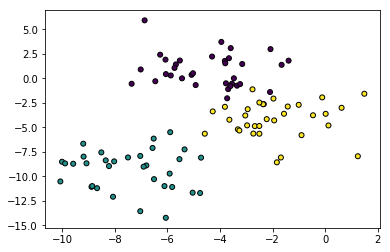

<Figure size 576x576 with 0 Axes>

In [139]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_features=2, centers=3,cluster_std = 1.8)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.figure(figsize=(8, 8))
plt.show()


Code a simple K-means algorithm with an option to plot, at each iteration, the position of the centroids. Benchmark your algorithm on the blob dataset above.
(The option can be a line that one can comment/uncomment if you prefer)


In [140]:
import numpy as np
# put your code here
numPoints = X1.shape[0]
X1.shape





(100, 2)

In [141]:
centers = np.random.randint(numPoints, size=3)

In [142]:
m = np.zeros((3,2))

m[0] = X1[centers[0]]
m[1] = X1[centers[1]]
m[2] = X1[centers[2]]

m

array([[ -5.82016195, -11.08214141],
       [ -6.46169406,  -0.30114695],
       [ -7.03388655, -13.55181897]])

In [143]:
m1 = m
m0 = np.zeros((3,2))

criterion = sum(sum(np.square(m0 - m1)))

print(criterion)

431.6596804111424


In [144]:


epsilon = 1

center1 = np.zeros((1,2))
center2 = np.zeros((1,2))
center3 = np.zeros((1,2))

maxIter = 100
iterNum = 0

indexCluster =np.zeros((numPoints,1))

centerT = m0
centerTT = m1

while criterion > 1 and iterNum < maxIter:
    n1 = 0
    n2 = 0
    n3 = 0
    for ii in range (0, numPoints-1):
        
        d1 = np.sqrt(sum(np.square(X1[1,:] - m1[0])))
        d2 = np.sqrt(sum(np.square(X1[1,:] - m1[1])))
        d3 = np.sqrt(sum(np.square(X1[1,:] - m1[2])))

        distanceMat = [d1,d2,d3]

        indexCluster[ii] = np.argmin(distanceMat)
        
        if indexCluster[ii]==0:
            center1 = center1 + X1[ii,:]
            n1 = n1 + 1
        elif indexCluster[ii]==1:
            center2 = center2 + X1[ii,:]
            n2 = n2 + 1
        else:
            center3 = center3 + X1[ii,:]
            n3 = n3 + 1
    
#     if n1 == 0:
#         centers = np.random.randint(numPoints, size=3)
        
    centerT[0] = centerTT[0]
    centerT[1] = centerTT[1]
    centerT[2] = centerTT[2]
    
    centerTT[1] = center1/n1
    centerTT[1] = center2/n2
    centerTT[1] = center3/n3
    
    iterNum = iterNum + 1
    print(iterNum)
print(centerTT)

/Users/carolhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/Users/carolhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[[  -5.82016195  -11.08214141]
 [-461.4942137  -414.67678704]
 [  -7.03388655  -13.55181897]]


### 2.1.2 Text mining (4pts)

(adapted from A. Kumar)

In this exercice, we will keep your K-means algorithm from exercice 2.1.1 but apply it to a text/data mining problem. We will group subsets of documents according to the meaning of these documents. 

In our simplified framework, our documents are simple sentences which are stored in the file "Documents.txt". Note that the principle would be exactly the same if you were to work with larger documents or even webpages.

How many classes are there according to you ? What are those classes ? 


I think the classes would be the individual words, and 

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

In order to apply K means to "Documents.txt", we first need to turn the sentences into 
numerical values. There are several ways to implement this step (including __countvectorizer__ and __tf-idf__).

Here we will use the __TfidfVectorizer__ from __scikit-learn__. __tf-idf__ is used to classify documents for example in search engines. In the list above, each sentence should be understood as a document. 

In __countvectorizer__, every word would be given the same weight and would thus be represented by a vector in which each entry is either 0 or 1 depending on whether the word appears in the document or not.

__Tf-idf__ goes one step further and computes a statistics telling how important the particular word is for the document. 

Tfidf has two parts:

1. A Term frequency which indicates how often a particular word appears in a document (tf)

2. An inverse document frequency (idf) which is calculated by taking the log of the number of docs in the list divided by the number of docs in which the particular word appears

The total weight is then given by weight = tf*idf

To understand the value of this decomposition, think of the work "the". This word would happen a lot in each of the documents. However it is not really representative of the documents meaning. "the" will have a large __tf__. However as it appear in almost all documents, the log ratio will be 0 or close to zero and so will be the resulting (idf) index. 


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
 

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    y = processed.split()
    return y


path = "documents.txt"

train_clean_sentences = []
fp = open(path,'r')
for line in fp:
    line = line.strip()
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    train_clean_sentences.append(cleaned)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_clean_sentences)
print(X)

  (0, 247)	0.17381773990277985
  (0, 47)	0.17381773990277985
  (0, 44)	0.3898958136388453
  (0, 213)	0.19494790681942264
  (0, 55)	0.19494790681942264
  (0, 162)	0.19494790681942264
  (0, 147)	0.19494790681942264
  (0, 274)	0.19494790681942264
  (0, 76)	0.19494790681942264
  (0, 152)	0.19494790681942264
  (0, 182)	0.11656531405399523
  (0, 33)	0.19494790681942264
  (0, 56)	0.1471968778862284
  (0, 92)	0.19494790681942264
  (0, 40)	0.19494790681942264
  (0, 171)	0.3898958136388453
  (0, 39)	0.17381773990277985
  (0, 53)	0.19494790681942264
  (0, 59)	0.19494790681942264
  (0, 232)	0.19494790681942264
  (0, 180)	0.19494790681942264
  (0, 181)	0.19494790681942264
  (1, 182)	0.1541278211054594
  (1, 56)	0.1946302315251487
  (1, 46)	0.25776875694968276
  :	:
  (27, 66)	0.37082326038307467
  (27, 179)	0.4551608595542422
  (27, 173)	0.4551608595542422
  (27, 276)	0.4551608595542422
  (28, 218)	0.32484702598322296
  (28, 268)	0.3792078592378042
  (28, 67)	0.1896039296189021
  (28, 16)	0.2541722

Print the matrix X above. This matrix should be of the form
(Document index, Specific word-vector index) TFIDF score for the word in the document. In other words each sentence is represented by a long feature vector encoded by the corresponding row in the matrix X.

Apply your K means algorithm on that data matrix (you might have to convert the rows to full vectors before you process them with Kmeans as the matrix original type is sparse)

TypeError: object of type 'int' has no len()

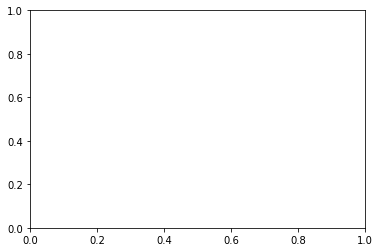

In [148]:
# put your code here
import sklearn 

kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=100)
plt.title("Incorrect Number of Blobs")

plt.show()


Once you are done with the training (i.e you have computed the centroids and clusters), benchmark your algorithm against the following three sentences using the snippet below

In [145]:
# Predicting it on test data : Testing Phase
test_sentences = ["Paris reputation as the City of Lights is actually due to its historical legacy.",\
"In the 21st century, most sailing represents a form of recreation or sport. Recreational sailing or yachting can be divided into racing and cruising",\
"Machine learning is a area of Artificial intelligence"]
 
test_clean_sentence = []
for test in test_sentences:
    cleaned_test = clean(test)
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+","",cleaned)
    test_clean_sentence.append(cleaned)
 
    Test = vectorizer.transform(test_clean_sentence)
    
    # Put your code here. For each of the new sentences, return the closest centroid 
    # and its corresponding label. I.e associate a label 0,1 or 2 to each of the three clusters
    
Test

    
 

<3x277 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

Compare your prediction with each of the clusters labels using the snippet below. Does it match the topic ?

In [20]:
   
print("\nBelow 3 sentences will be predicted against the learned neighborhood and learned clusters:\n1. ",\
test_sentences[0],"\n2. ",test_sentences[1],"\n3. ",test_sentences[2])
 
print("\n-------------------------------PREDICTIONS BY K-Means--------------------------------------")
print("\nIndex of Paris cluster : ", )# put label most represented among Paris sentences
print("Index of Artificial Intelligence cluster : ", )# put label most represented among AI sentences)
print("Index of Sailing cluster : ", )# put label most represented among Sailing sentences)

predicted_labels_kmeans = [0,0,0]

print("\n",test_sentences[0],":",predicted_labels_kmeans[0],
"\n",test_sentences[1],":",predicted_labels_kmeans[1],
"\n",test_sentences[2],":",predicted_labels_kmeans[2] )
# predicted_labels_kmeans is your prediction for each sentence



Below 3 sentences will be predicted against the learned nieghbourhood and learned clusters:
1.  Paris reputation as the City of Lights is actually due to its historical legacy. 
2.  In the 21st century, most sailing represents a form of recreation or sport. Recreational sailing or yachting can be divided into racing and cruising 
3.  Machine learning is a area of Artificial intelligence

-------------------------------PREDICTIONS BY K-Means--------------------------------------

Index of Paris cluster : 
Index of Artificial Intelligence cluster : 
Index of Sailing cluster : 

 Paris reputation as the City of Lights is actually due to its historical legacy. : 0 
 In the 21st century, most sailing represents a form of recreation or sport. Recreational sailing or yachting can be divided into racing and cruising : 0 
 Machine learning is a area of Artificial intelligence : 0


## 2.2. Dimensionality reduction (6pts)

Another important class of unsupervised algorithms is the class of dimensionality reduction algorithms. Among those algorithms, one finds Principal component analysis (PCA) or latent variable models such as Gaussian mixtures but also manifold learning algorithms

### 2.2.1 A space odyssey: Denoising with PCA  (3pts)

Most images are living in a low dimensional space characterized by the structure that is present in the image. As a particularly relevant application of this idea, when considering a collection of noisy images acquired from a single suboptimal imaging device and representing a unique object or structure. Repetition in the sequence is then very high and can be used to extrasct information. 

For this exercice, we will work with images from the NASA (https://www.nasa.gov/mission_pages/newhorizons/main/index.html)

"New Horizons launched on Jan. 19, 2006; it swung past Jupiter for a gravity boost and scientific studies in February 2007, and conducted a six-month-long reconnaissance flyby study of Pluto and its moons in summer 2015, culminating with Pluto closest approach on July 14, 2015."
(source: https://www.nasa.gov/ames/newhorizons)

In [22]:
import numpy as np
import scipy as sp
from scipy import misc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition

from skimage import color
from skimage import io

Image source: https://www.nasa.gov/ames/newhorizons


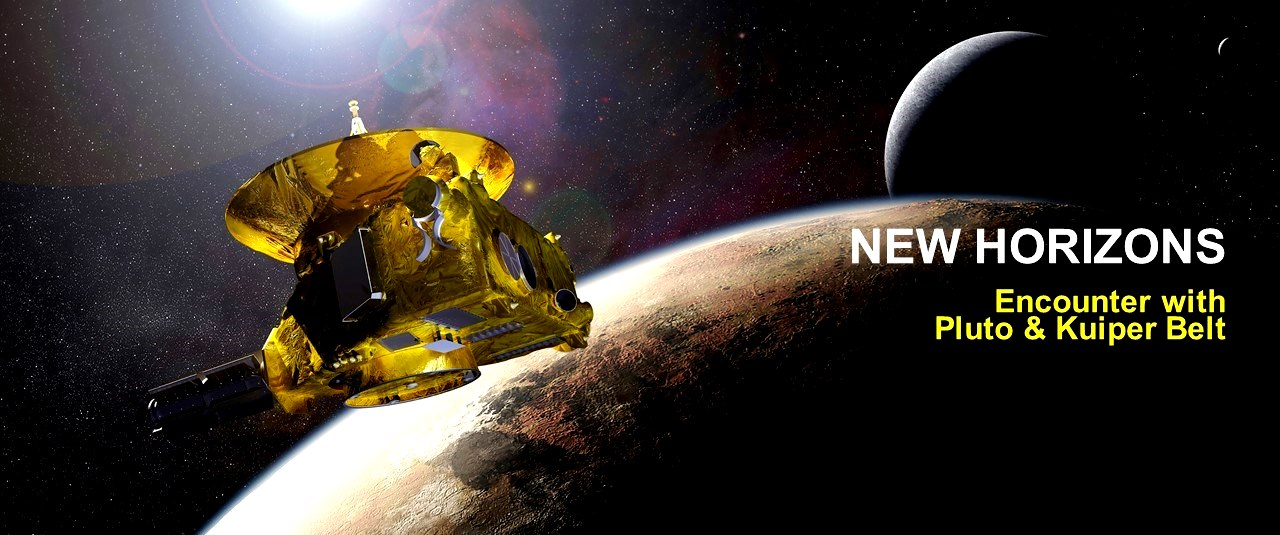

In [23]:
from IPython.display import Image
print('Image source: https://www.nasa.gov/ames/newhorizons')
Image(filename='plutoNewHorizons.jpg')

Images obtained from Deep space probe missions are often noisy because various factors (camera's electronics, random fluctuations in the arrivals of photons as captured by the sensor,..) 

A few real world examples are show below

source :  https://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367259

/Users/carolhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/carolhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


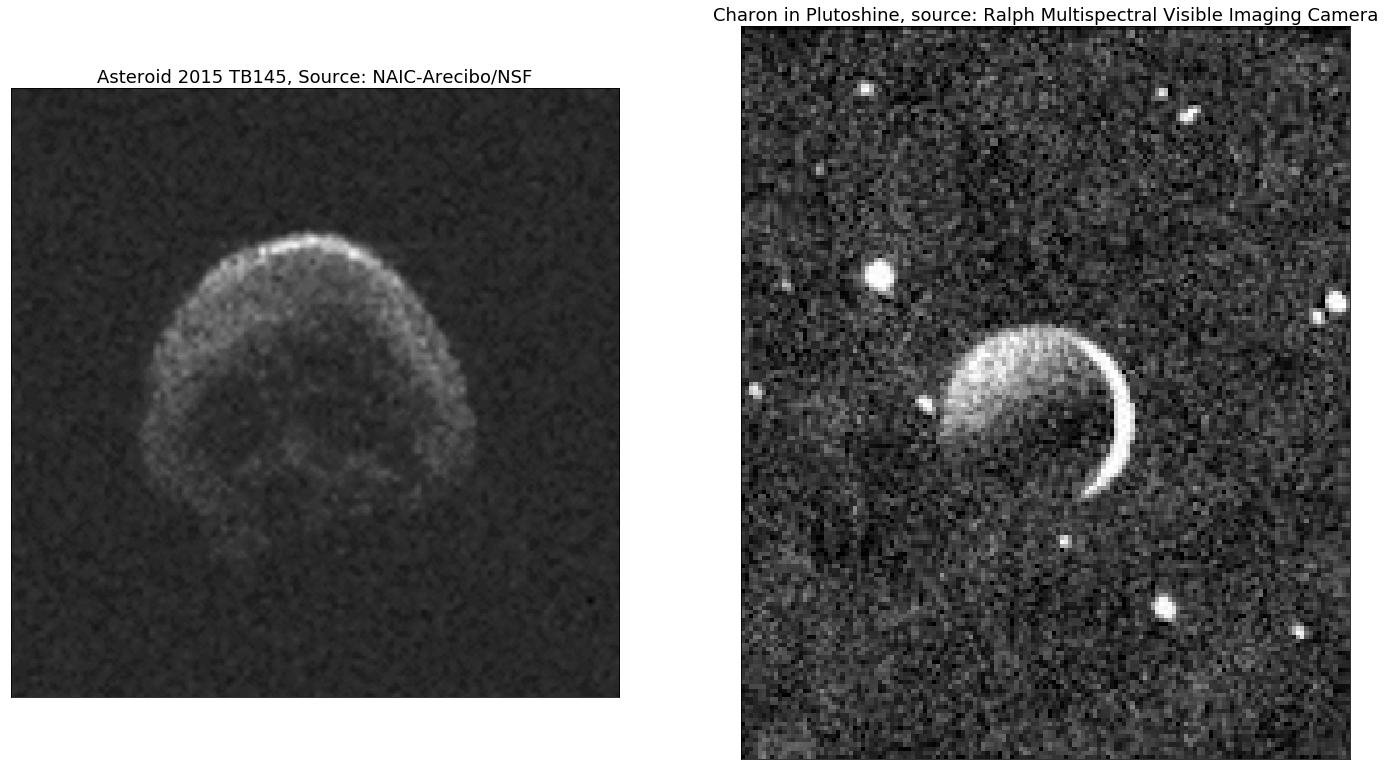

In [24]:
ImageNasa1 = misc.imread('skull2015-TB145.jpg')
ImageNasa2 = misc.imread('nh-charon-by-plutoshine.jpg')
fig = plt.figure(figsize = (24,24))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Asteroid 2015 TB145, Source: NAIC-Arecibo/NSF', fontsize=18)
plt.imshow(ImageNasa1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Charon in Plutoshine, source: Ralph Multispectral Visible Imaging Camera', fontsize=18)
plt.imshow(ImageNasa2)
plt.show()

/Users/carolhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(444, 444)
float64


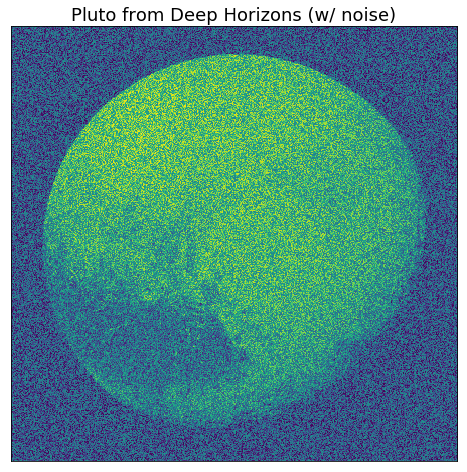

In [28]:

image = misc.imread('plutoLarge.png')
img = color.rgb2gray(image)
print(img.shape)
print(img.dtype)
noisy = img + 3*img.std() * np.random.random(img.shape)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Pluto from Deep Horizons (w/ noise)', fontsize=18)
ax1.imshow(noisy,aspect='auto')
plt.show()


The matrix data below encodes a series of images of Pluto, corrupted with Gaussian noise (assumed to arise from the imaging device). Use PCA to derive a better image. 

In [29]:
sizePluto = image.shape
print(sizePluto)
sh = (sizePluto[0]*sizePluto[1], 10)
data = np.zeros(sizePluto[0]*sizePluto[1]*10).reshape(*sh)
print(data.shape)
for i in range(0, 9):
    noisy_i = img + 3*img.std() * np.random.random(img.shape)
    data[:,i] = np.squeeze(np.reshape(noisy_i,(sizePluto[0]*sizePluto[1],1)))
    

(444, 444, 4)
(197136, 10)


In [36]:
# Put your code here. Compute the first principal component from the matrix data and display the result below
from sklearn.decomposition import PCA
b = PCA(data)
print(b)

pca = PCA(n_components=2, random_state=None,)

pca.fit(data)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)



PCA(copy=True, iterated_power='auto',
  n_components=array([[0.22649, 0.47963, ..., 0.6689 , 0.     ],
       [1.04735, 0.29721, ..., 0.81042, 0.     ],
       ...,
       [0.75545, 0.80845, ..., 0.9168 , 0.     ],
       [0.79274, 0.81101, ..., 0.24821, 0.     ]]),
  random_state=None, svd_solver='auto', tol=0.0, whiten=False)
[0.61868108 0.04806913]
[488.45650562 136.15250319]


### 2.2.2 Dimension reduction and manifold learning (3pts)

(adapted from V. Parekh)

In this second dimensionality reduction example we illustrate the interest of 
manifold learning approaches. 

Start by downloading the Wisconsin breast cancer dataset from Kaggle. You can find either here : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data or on the UCI ML repository. (Note that it is the repo so if you fork it should be fine)

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output

Read the file with pd.read_csv and store it as a pandas data array. Display the header

In [119]:
# put your code here
data = pd.read_csv("breast_cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [125]:
# Preprocessing the data
# deleting confusing features
# data = data.drop(['id']) #,axis=1, inplace=True
# data = data.drop(['Unnamed: 32'])
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

# Creating new frame with standardized (centered w.r.t mean and scaled to unit variance) 
# columns except the cancer type (0/1)
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
# keeping same labels
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# As we do unsupervised learning, we drop the type of cancer (we keep it in datas for 
# later display though)
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

- Use a locally linear embedding approach (see the scikit-learn doc) to get a 2D representation of X (use number of neighbors = 2,5 and 10)
- Display the result using the lines below
- What is the best number of neighbors (among {2,5,10}) to discriminate between Malignant and Benign ?

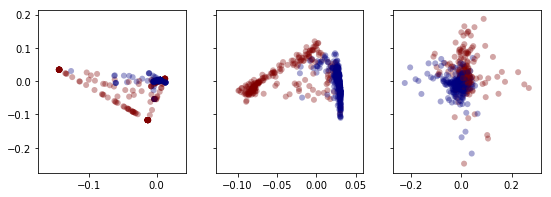

In [128]:
from sklearn.manifold import LocallyLinearEmbedding
 
# put your code here
# first create the LLE mapping object

embedding2 = LocallyLinearEmbedding(n_components=2, n_neighbors=2)
embedding5 = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
embedding10 = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

# then use the fit_transform to apply it to X and store the result in a variable Y

Y = embedding2.fit_transform(X)
Y2 = embedding5.fit_transform(X)
Y3 = embedding10.fit_transform(X)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35) 
axs[1].scatter(Z[:,0],Y2[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35) 
axs[2].scatter(M[:,0],Y3[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35) 

# add some more code here to display as sublots 2 and 3 the result of LLE with nneighbors =5 and 10

__Bonus (2pts)__ Apply the Kmeans implementation from scikit-learn with nclusters = 2 to the nneighbors = 2 and 5 embeddings and count the misclassification rate. 

In [ ]:
# put your code here





## 2.3. Generative adversarial network (5 pts)

(Adapted from various sources including R.Apienza and M. Spinelli)

In this exercice, we will study how one can combine two neural networks to design a classifier that is more robust against adversarial samples. 
__Although the exercice might seem long, you will be guided through it and given all the necessary information.__ 

A generative Adversarial network (GAN) works by combining two interacting neural networks. GANs constitute one of the most promising approaches of the last few years. 

The first neural network is used to generate images that are as close as possible to the true data distribution (e.g. digits). The second neural network is trained to discriminate between the images produced by the generator and the images from the dataset (See the image below)


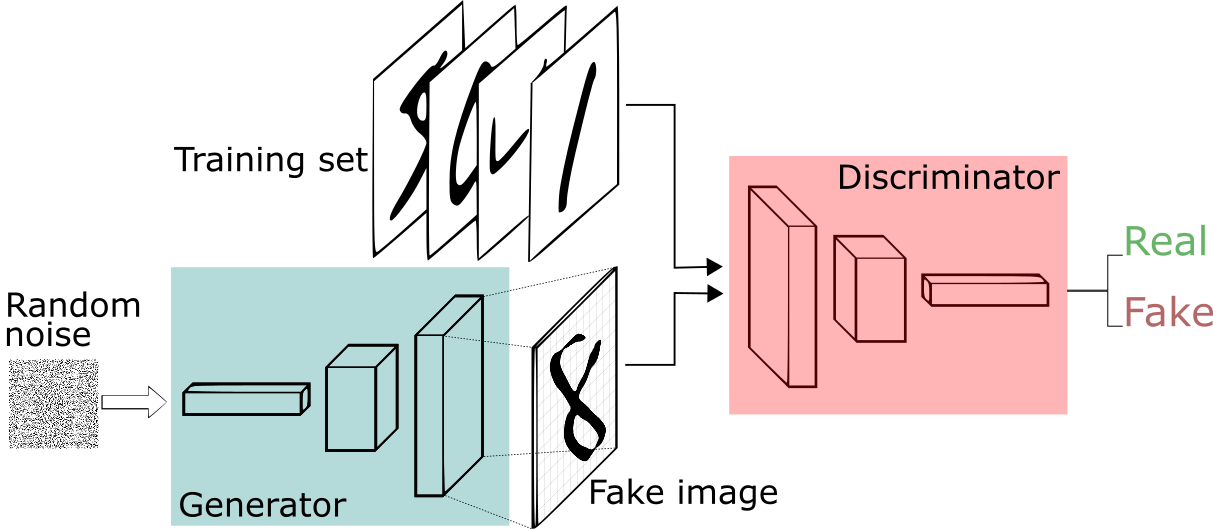

In [112]:
from IPython.display import Image
Image(filename='GANimage1.png')


Generative Adversarial networks 

In [128]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

(60000, 28, 28, 1)


We will start by building the __discriminator__. At the ouptut of the discriminator, we want a [0,1] scalar indicating the probability that the input was a digit from the original dataset (1) or an artificially generated sample.

For this discriminator, we again use the sequential model from Keras. 

- We will add four layers with 32*k (k=1,2,4,8) filters of size [5,5] each. For those filters, set the activation function to be the LeakyReLU. In summary, you need to set three parameters
  1. The number of units (32*k)
  2. The size of each of the filters (5 by 5)
  3. The filter stride (see session 2, that is the number of pixels by which we translate the filters when doing the convolutions). Here we set it to 2
  4. Use padding = 'same' for now
  5. Finally set the activation to LeakyReLU with parameter alpha = 0.2
  6. For the first layer you also need to set the size of the input which for the MNIST dataset is 20. I.e input_size = (28,28,1)  
    
- After __each__ of those layers, we will add a dropout layer setting 40% of the units to zero at random when training the network (keep all the other parameters to their default values) (__see the figure below__)
- As in the second programming session, after __all__ the convolutions (i.e thus __only at the end__ of the network), we add a flattening layer which takes the image and reorganize it as a vector. (no argument needed here just add flatten)
- Then add a fully connected layer which sums up the entries of the (flattened) vector and pass it to a sigmoid in order to get a [0,1] output indicating whether the input was generated by the generator or is from the training set. This can be done with two lines: one that add a Dense layer with one unit and a second which adds a sigmoid. This is a simple line with two commands, __model.add(Dense(1))__ and __model.add(Activation('sigmoid'))__

Ok we are now done with the __discriminator__. Check the model using the command model.summary().

source: Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from Overfitting


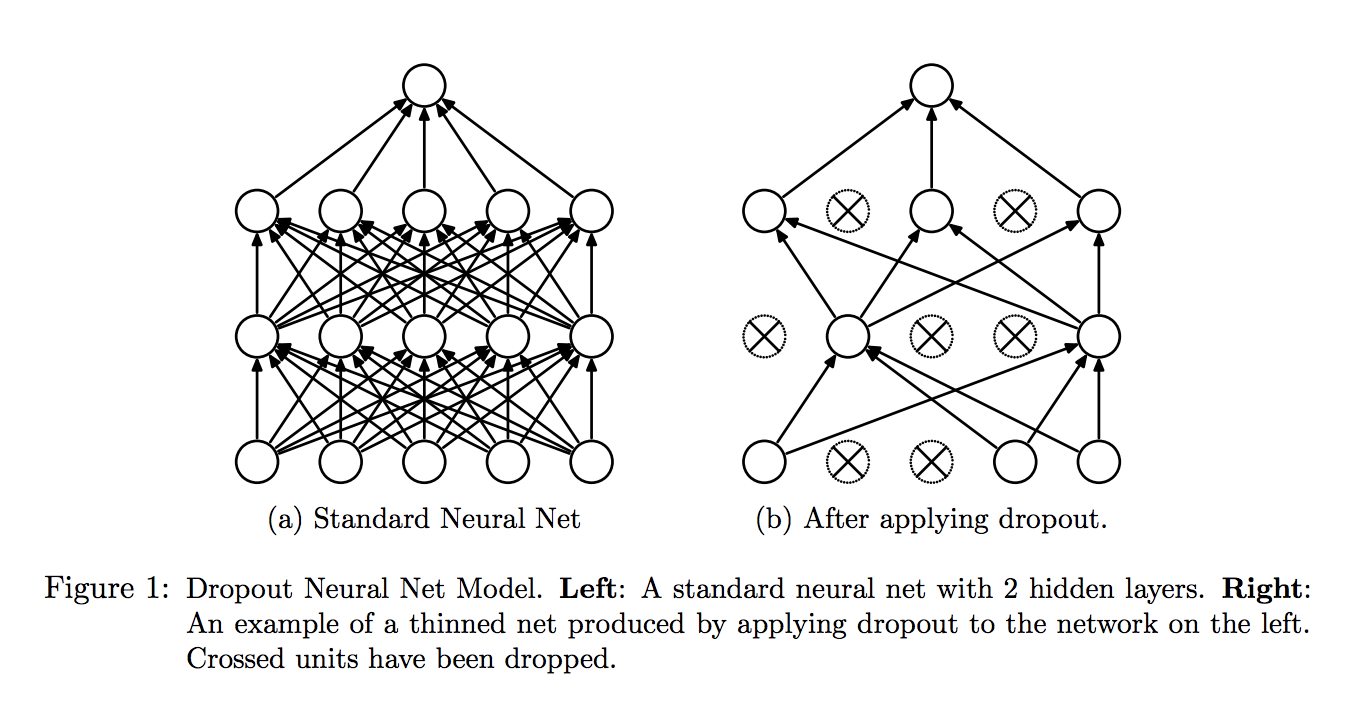

In [117]:
print('source: Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from Overfitting')
from IPython.display import Image
Image(filename='DropoutHinton.png')


In [ ]:
# put your code here 






We now build the __generator__. The generator is a second neural network that synthesizes images 
from a vector of noise (see above). The hope underlying the construction of a generative model is that it could ultimately capture the features underlying the images of the dataset (i.e understand the distribution of those images and hence be able to generate them)  

We will use a generator of the form shown below. To build this generator we will use the notion of 
transposed convolution. Recall that a convolution is an operation that takes as input an image and ouput a local average of the pixels from the input image (see the figure below as a reminder) 

source: https://openai.com/


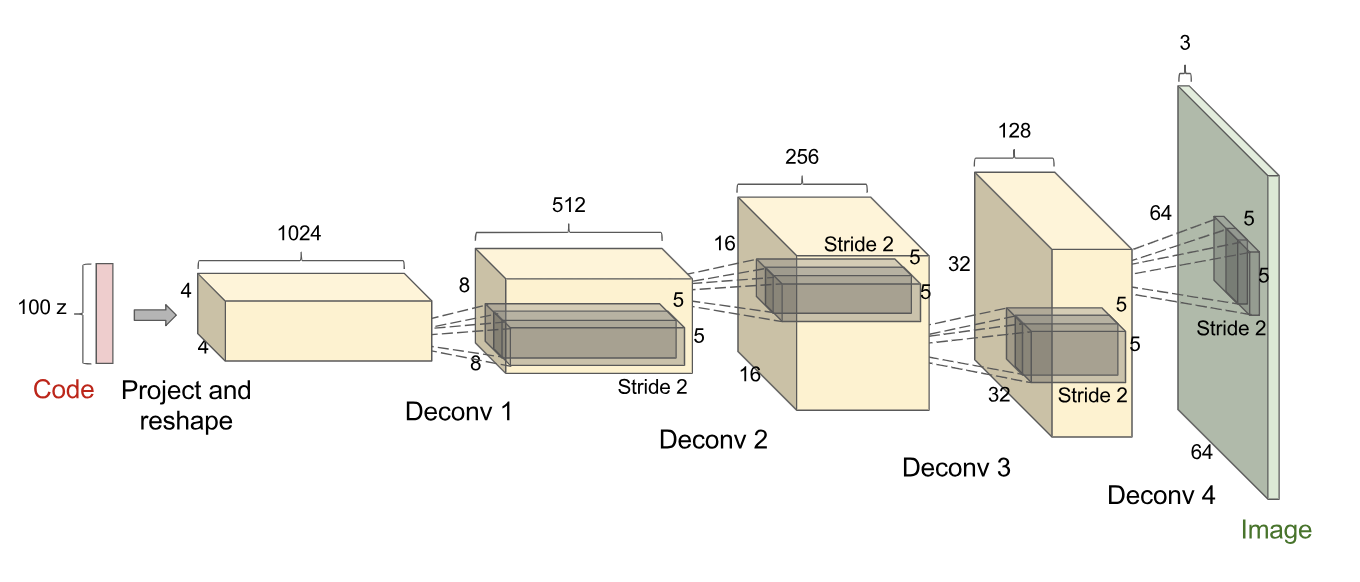

In [119]:
print('source: https://openai.com/')
from IPython.display import Image
Image(filename='GenerativeImage1.png')

In [ ]:
from IPython.display import Image
Image(filename='convolutionExplained1.png')

In the generative model, we want to generate images that have some local coherence. 

To achieve this, we will use the "reverse" of the convolution operator known as transposed convolution. 

The __transposed convolution__ starts from a smaller image, padds it with a border of zero and then apply to the extended result a convolution operator. In the example below the transposed convolution takes as input a 2x2 image and a 3x3 filter with a stride of 1. It then computes the convolution of the two.


![SegmentLocal](transposedConvolution.gif "segment")

The output to the transposed convolution operator is computed as follows (see the Keras doc)

new_rows = ((rows - 1) * strides[0] + kernel_size[0]
            - 2 * padding[0] + output_padding[0])
new_cols = ((cols - 1) * strides[1] + kernel_size[1]
            - 2 * padding[1] + output_padding[1])
            
When choosing padding ='same' which is what we will do here, the size of the padding (the zeros you add to the original image) is set so that the output has the same size as the input. 

As a consequence, if we take a filter of size k then we need to padd the original image with (k-1)/2 zeros. (But no worries, This is calculated automatically when setting padding = 'same').


To build the generator, follow the instructions below

 - Take a sequential model from Keras
 - Start the model with a dense layer of depth D=256 units with input dimension = 100 (we take a random vector of size 100 as our input)
 - After the first input layer we will add a (batch) normalization step. Batch normalization works by normalizing the inputs of the non linearity (see https://arxiv.org/pdf/1502.03167.pdf for more details)
 
 $$x_i \leftarrow \frac{x_i - \mu_i}{\sigma_i}$$ 
 
 After normalization, to avoid restricting the input to entral part of the non linearity, batch normalization adds two parameters $\gamma$ and $\beta$ which are "learned" automatically while training the network. This output to the batch normalization step thus reads as
 
 $$x_i \leftarrow \gamma\frac{x_i - \mu_i}{\sigma_i} + \beta $$
 
 This prevent a large variability in the input distribution to each layer. More details can be found in https://arxiv.org/pdf/1502.03167.pdf
 
When adding the BatchNormalization step, you only need to specify __one parameter__, the __momentum__ which you can take to be __.9__

- You can now add the activation unit. We choose to add a 'Relu'
- Add a Reshape Layer that turns the output of the previous steps (size at that point should be 7*7*N) into a set of N images (i.e a variable of size (7,7,N)). (This really is one line: __.add(Reshape((7, 7, N))__)

- Finally, add the usual dropout step to set 40% of the units to zero

In [ ]:
# put your code here



Ok. From what we have done so far, we now have a set of images of size 7 by 7 whereas we would like one artificial image of size 28 by 28. 

- Add an upsampling step (Upsampling2D). Without any argument, this will interpolate the input images by repeating each row and each column once. The image should now be of size 14 by 14

- Add a first transposed convolutional layer (Conv2DTranspose) with three parameters:
    1. The depth = D/2 (see above)
    2. The filter size = 5
    3. padding = 'same'
   
- Add a batch normalization step with same momentum (.9) as before
- Add the activations (relu) and upsample one more time. We now have a set of images of size 28 by 28. 

- Add twice the following combination (using a number of units D/4 and D/8)

    1. 2D Transposed convolutional layer
    2. Batch Normalization layer (same momentum as before)
    3. Activation (relu)
    
We now still have a collection of 28 by 28 images generated by each of the hidden units and we want a single 28 by 28 output. 

- Add a last transposed convolutional layer with a single hidden unit (5 by 5 filters and padding same)
- Add a sigmoid activation (for this example, we want the pixel values to lie in [0,1])
- Check the summary of your model by using model.summary()
    


In [ ]:
# put your code here




We now have both the discriminator and the generator and we are almost there. Before training the GAN, we need to do a couple more things. First we need to set up the learning process as we did during class for the simple convolutional neural network. Except that we now set it for the combination.

1. Set up Discriminator.  

 - As we did in the programming session for the simple CNN, first define the optimizer. Use the RMSProp optimizer from Keras with a learning rate of .0008, a weight decay of 6e-8 and set an additional clipvalue parameter equal to 1 (so 3 parameters in total). __optimizer = RMSprop()__ (you can find more information on gradient clipping for ex. here https://www.quora.com/What-is-gradient-clipping-and-why-is-it-necessary)
 
 
 - Use the __compile__ function to set up the learning process as we did during class. Use the binary cross entropy loss with the optimizer you defined above and set the metric to 'accuracy' (3 parameters in total)


In [ ]:
# put your code here




We now set up the optimization framework for the adversarial network. We first build the adversarial network from the combination of the generator and the discriminator. It is thus a two pieces network. To build this combination, use the keras model you built for the discriminator and the generator and associate them into a single sequential adversarial model using the liens below

In [ ]:
AdversarialModel = Sequential()
AdversarialModel.add(self.generator())
AdversarialModel.add(self.discriminator())

Now set the optimization framework for that model using teh exact same parameters and command lines as for the discriminator model __except__ for the learning rate which we now set to 0.0004

In [ ]:
# put your code here




OK. We can finally train the generative/discriminative combination. The principle is as follows. We will alternate between the following two steps:

1.  Training the discriminator by combining images from the training set and images generated by the adversarial generator. This step is thus a simple supervised learning problem applied to the discriminator

2. We then train the adversarial network (i.e the combination generator + discriminator) to return label 1 all the time, that is for any vector of noise  

Within each outer iteration we will use a single gradient update via the function __train_on_batch__ from Keras (see below) 


You need to set 
- The number of epochs (you will need to have a sufficiently large number here. Something on the order of 20000 but you can try various number). Here epochs means number of iterations 
- The batch size, which is the total number of images you use at each iteration (Set it to 32) 
- Also set up a saveStep param which is the multiple of iterations after which you save the images

In [ ]:
for iterNum in range(epochs):
    
    ## train the discriminator
    random_index =  np.random.randint(0, X_train.shape[0],size=batch/2)
    TrueImages = X_train[random_index,:,:,:].reshape(batch/2,X_train.shape[1],X_train.shape[2],1)
    
    # generating the fake images
    gen_noise = np.random.normal(0, 1, (batch/2,100))
    
    # Add code: use your generator to create teh fake (batch/2) images
    FakeImages = YourGenerator.predict(gen_noise)
    
    
    CombinedImages = np.concatenate((TrueImages, FakeImages))
    CombinedLabels = np.concatenate((np.ones((batch/2, 1)), np.zeros((batch/2, 1))))

    # put your discriminator here
    trainingStep1 = YourDiscriminator.train_on_batch(CombinedImages, CombinedLabels)
    # train the generator
    noise = np.random.normal(0, 1, (batch,100))
    AdversarialLabels = np.ones((batch, 1))
    
    # Add code here, replace with the name of your AdversarialModel (i.e combined Generator-Discriminator)
    trainingStep2 = AdversarialModel.train_on_batch(noise, AdversarialLabels)
    
    print ('epoch: %d, [Discriminator :: loss: %f], [ Generator :: loss: %f]' % (iterNum, trainingStep1[0], trainingStep2))
            
    if iterNum % saveStep == 0 : 
        
        # add the modified piece of code (below) for image display
        
        
        

You can adapt/use the snippet below to plot and/or save a set of images generated by the generator when your saveStep is amultiple

In [ ]:
        images = YourGenerator.predict(noise)
        
        plt.figure(figsize=(10,10))
    
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [X_train.shape[1],X_train.shape[2]])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.tight_layout()
                if save2file:
                    plt.savefig(filename)
                    plt.close('all')
                else:
                    plt.show()